In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=22ec70578ad6e0406b4fe3804ca4f05ce4114c342766c080c119836859433c5a
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.simplefilter("ignore")


# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/MachineLearning/bsdatos_drive.xlsx")

landsat = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/landsat.xlsx")
landsat1 = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/Landsat_Datos.xlsx")

sentinel = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/sentinel.xlsx")
sentinel1 = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/Sentinel_Datos.xlsx")

dfx = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/x.xlsx")
dfy = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/y.xlsx")
dfy_new = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/dfy_new.xlsx")

y_bruta = pd.read_excel("/content/drive/MyDrive/MachineLearning/TrMachineLearning/y_bruta.xlsx")

In [1]:
dfy


NameError: ignored

# 1. Analisis exploratorio de datos

Media de cada variable independiente de acuerdo con la variable dependiente

In [ ]:
dfx['b2nb3'] = dfx['b2']/dfx['b3']
dfx['b3nb4'] = dfx['b3']/dfx['b4']
dfx['b8nb6'] = dfx['b8']/dfx['b6']
dfx['b8nb3'] = dfx['b8']/dfx['b3']


dfx['LB4nLB5'] = dfx['LB4']/dfx['LB5']
dfx['LB3nLB2'] = dfx['LB3']/dfx['LB2']
dfx

,b2,b8,b4,b3,b6,b5,b12,b11,b7,LB2,...,LB6,LB5,LB4,LB3,b2nb3,b3nb4,b8nb6,b8nb3,LB4nLB5,LB3nLB2
0,0.0213,0.0173,0.0194,0.0262,0.0180,0.0242,0.0075,0.0122,0.0234,0.144656,...,0.135235,0.080551,0.018531,0.026599,0.812977,1.350515,0.961111,0.660305,0.230050,0.183878
1,0.0220,0.0117,0.0167,0.0244,0.0108,0.0200,0.0097,0.0179,0.0199,0.143863,...,0.130489,0.071443,0.016058,0.022160,0.901639,1.461078,1.083333,0.479508,0.224770,0.154038
2,0.0238,0.0080,0.0181,0.0255,0.0104,0.0217,0.0027,0.0060,0.0123,0.144939,...,0.130577,0.072256,0.016328,0.021697,0.933333,1.408840,0.769231,0.313725,0.225970,0.149695
3,0.0181,0.0169,0.0163,0.0217,0.0227,0.0230,0.0065,0.0103,0.0220,0.144090,...,0.130735,0.071962,0.016426,0.021995,0.834101,1.331288,0.744493,0.778802,0.228254,0.152647
4,0.0183,0.0076,0.0151,0.0198,0.0090,0.0181,0.0028,0.0053,0.0102,0.141711,...,0.130050,0.069732,0.011456,0.015370,0.924242,1.311258,0.844444,0.383838,0.164289,0.108459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0226,0.0107,0.0169,0.0213,0.0133,0.0216,0.0047,0.0075,0.0128,0.145033,...,0.149597,0.111382,0.020783,0.033125,1.061033,1.260355,0.804511,0.502347,0.186591,0.228393
76,0.0175,0.0070,0.0098,0.0123,0.0082,0.0110,0.0040,0.0048,0.0093,0.138540,...,0.128555,0.065377,0.004994,0.007652,1.422764,1.255102,0.853659,0.569106,0.076384,0.055232
77,0.0186,0.0068,0.0095,0.0122,0.0089,0.0113,0.0027,0.0045,0.0098,0.139219,...,0.128538,0.065032,0.005630,0.008480,1.524590,1.284211,0.764045,0.557377,0.086576,0.060910
78,0.0202,0.0110,0.0174,0.0200,0.0132,0.0197,0.0028,0.0043,0.0149,0.144241,...,0.132827,0.080862,0.016401,0.021962,1.010000,1.149425,0.833333,0.550000,0.202828,0.152257


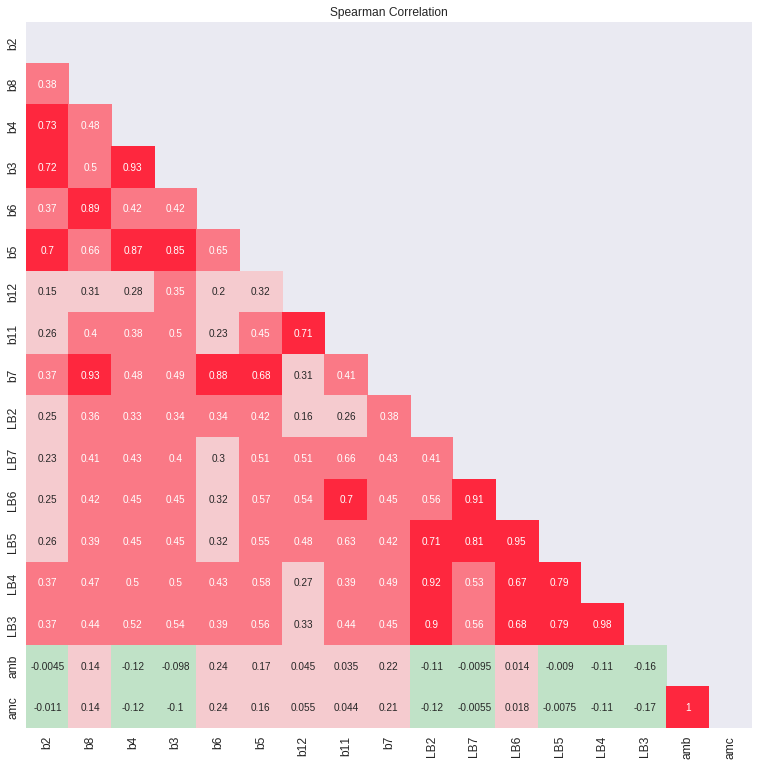

In [ ]:
db_new = df
corrs_new = db_new.corr(method = 'spearman')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 13))

mask = np.zeros_like(corrs_new, dtype=bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corrs_new,
            vmin = -1, vmax = 1, center = 0,
            annot     = True,
            mask = mask,
            cbar      = False,
            annot_kws = {"size": 10},
            cmap   = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3)
            # sbn.diverging_palette(0, 255, sep=77, as_cmap=True)
            # sbn.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3),
            )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
)
plt.title("Spearman Correlation")
ax.tick_params(labelsize = 12)

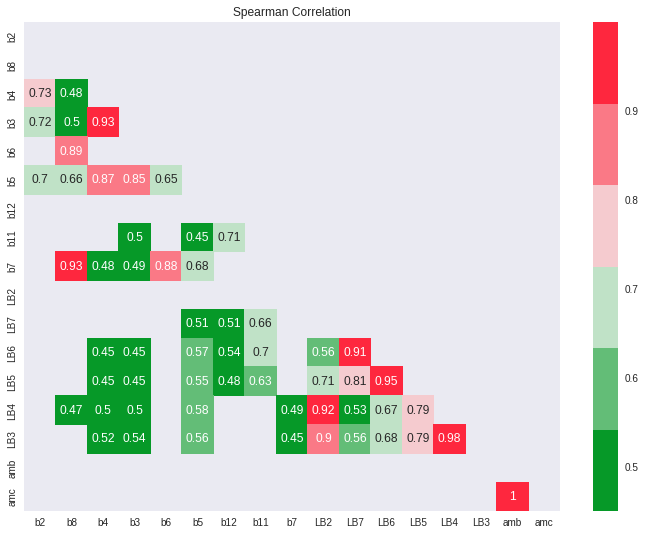

In [ ]:
dbCorr = db_new.corr(method = 'spearman')
filteredDb = dbCorr[((dbCorr >= .45) | (dbCorr <= -.55)) & (dbCorr !=1.000)]
plt.figure(figsize=(12,9))
sns.heatmap(filteredDb, annot=True, mask = mask, annot_kws = {"size": 12}, cmap=sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3))
plt.title("Spearman Correlation")
plt.show()

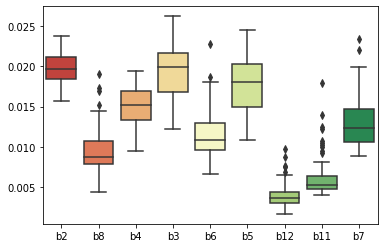

In [ ]:
 ax = sns.boxplot(data=sentinel, dodge=False,palette="RdYlGn")

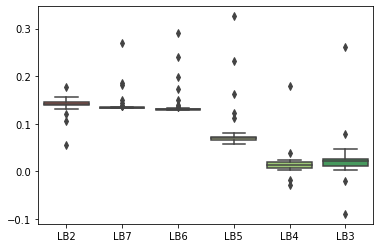

In [ ]:
 ax = sns.boxplot(data=landsat, dodge=False, palette="RdYlGn")

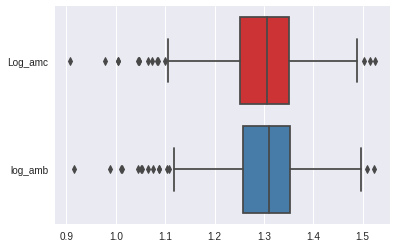

In [ ]:
 ax = sns.boxplot(data=dfy, orient="h", palette="Set1")

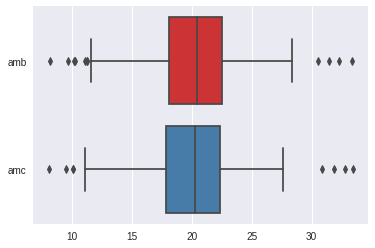

In [ ]:
 ax = sns.boxplot(data=y_bruta, orient="h", palette="Set1")

In [ ]:
dfy

,Log_amc,log_amb
0,1.428783,1.421275
1,1.363800,1.361728
2,1.368659,1.366610
3,1.489114,1.484727
4,1.109241,1.117271
...,...,...
75,1.431364,1.428297
76,1.300161,1.304275
77,1.303628,1.307710
78,1.278525,1.283301


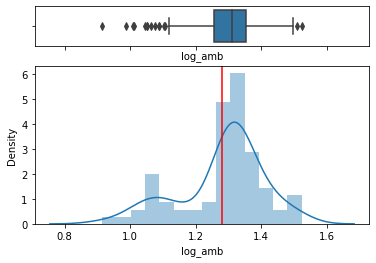

In [ ]:
# g2 = algas verdes + euglonofitas (b/a)


f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(dfy['log_amb'], ax=ax[0])
sns.distplot(dfy['log_amb'], ax=ax[1])
ax[1].axvline(np.mean(dfy['log_amb']), color='red')

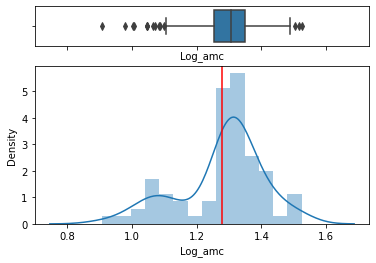

In [ ]:
# g1 = dinoflaglados + diatomeas + algas cafes (c/a)


f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(dfy['Log_amc'], ax=ax[0])
sns.distplot(dfy['Log_amc'], ax=ax[1])
ax[1].axvline(np.mean(dfy['Log_amc']), color='red')

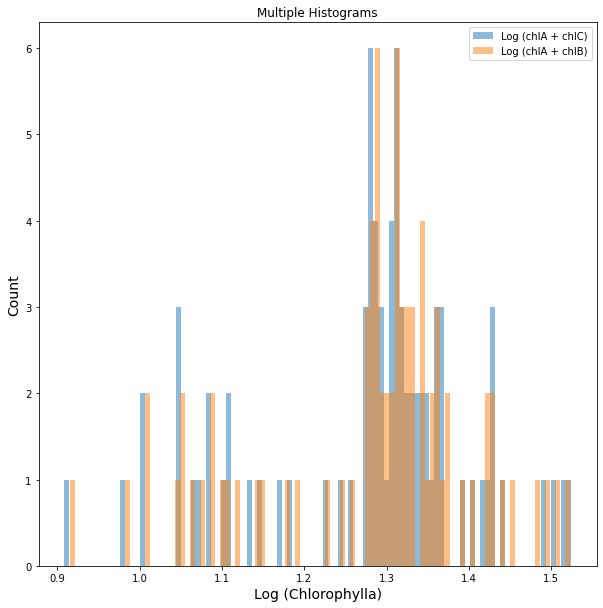

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(dfy['Log_amc'], bins=100, alpha=0.5, label="Log (chlA + chlC)")
plt.hist(dfy['log_amb'], bins=100, alpha=0.5, label="Log (chlA + chlB)")
plt.xlabel("Log (Chlorophylla)", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms")
plt.legend(loc='upper right')
plt.savefig("reflect.png")


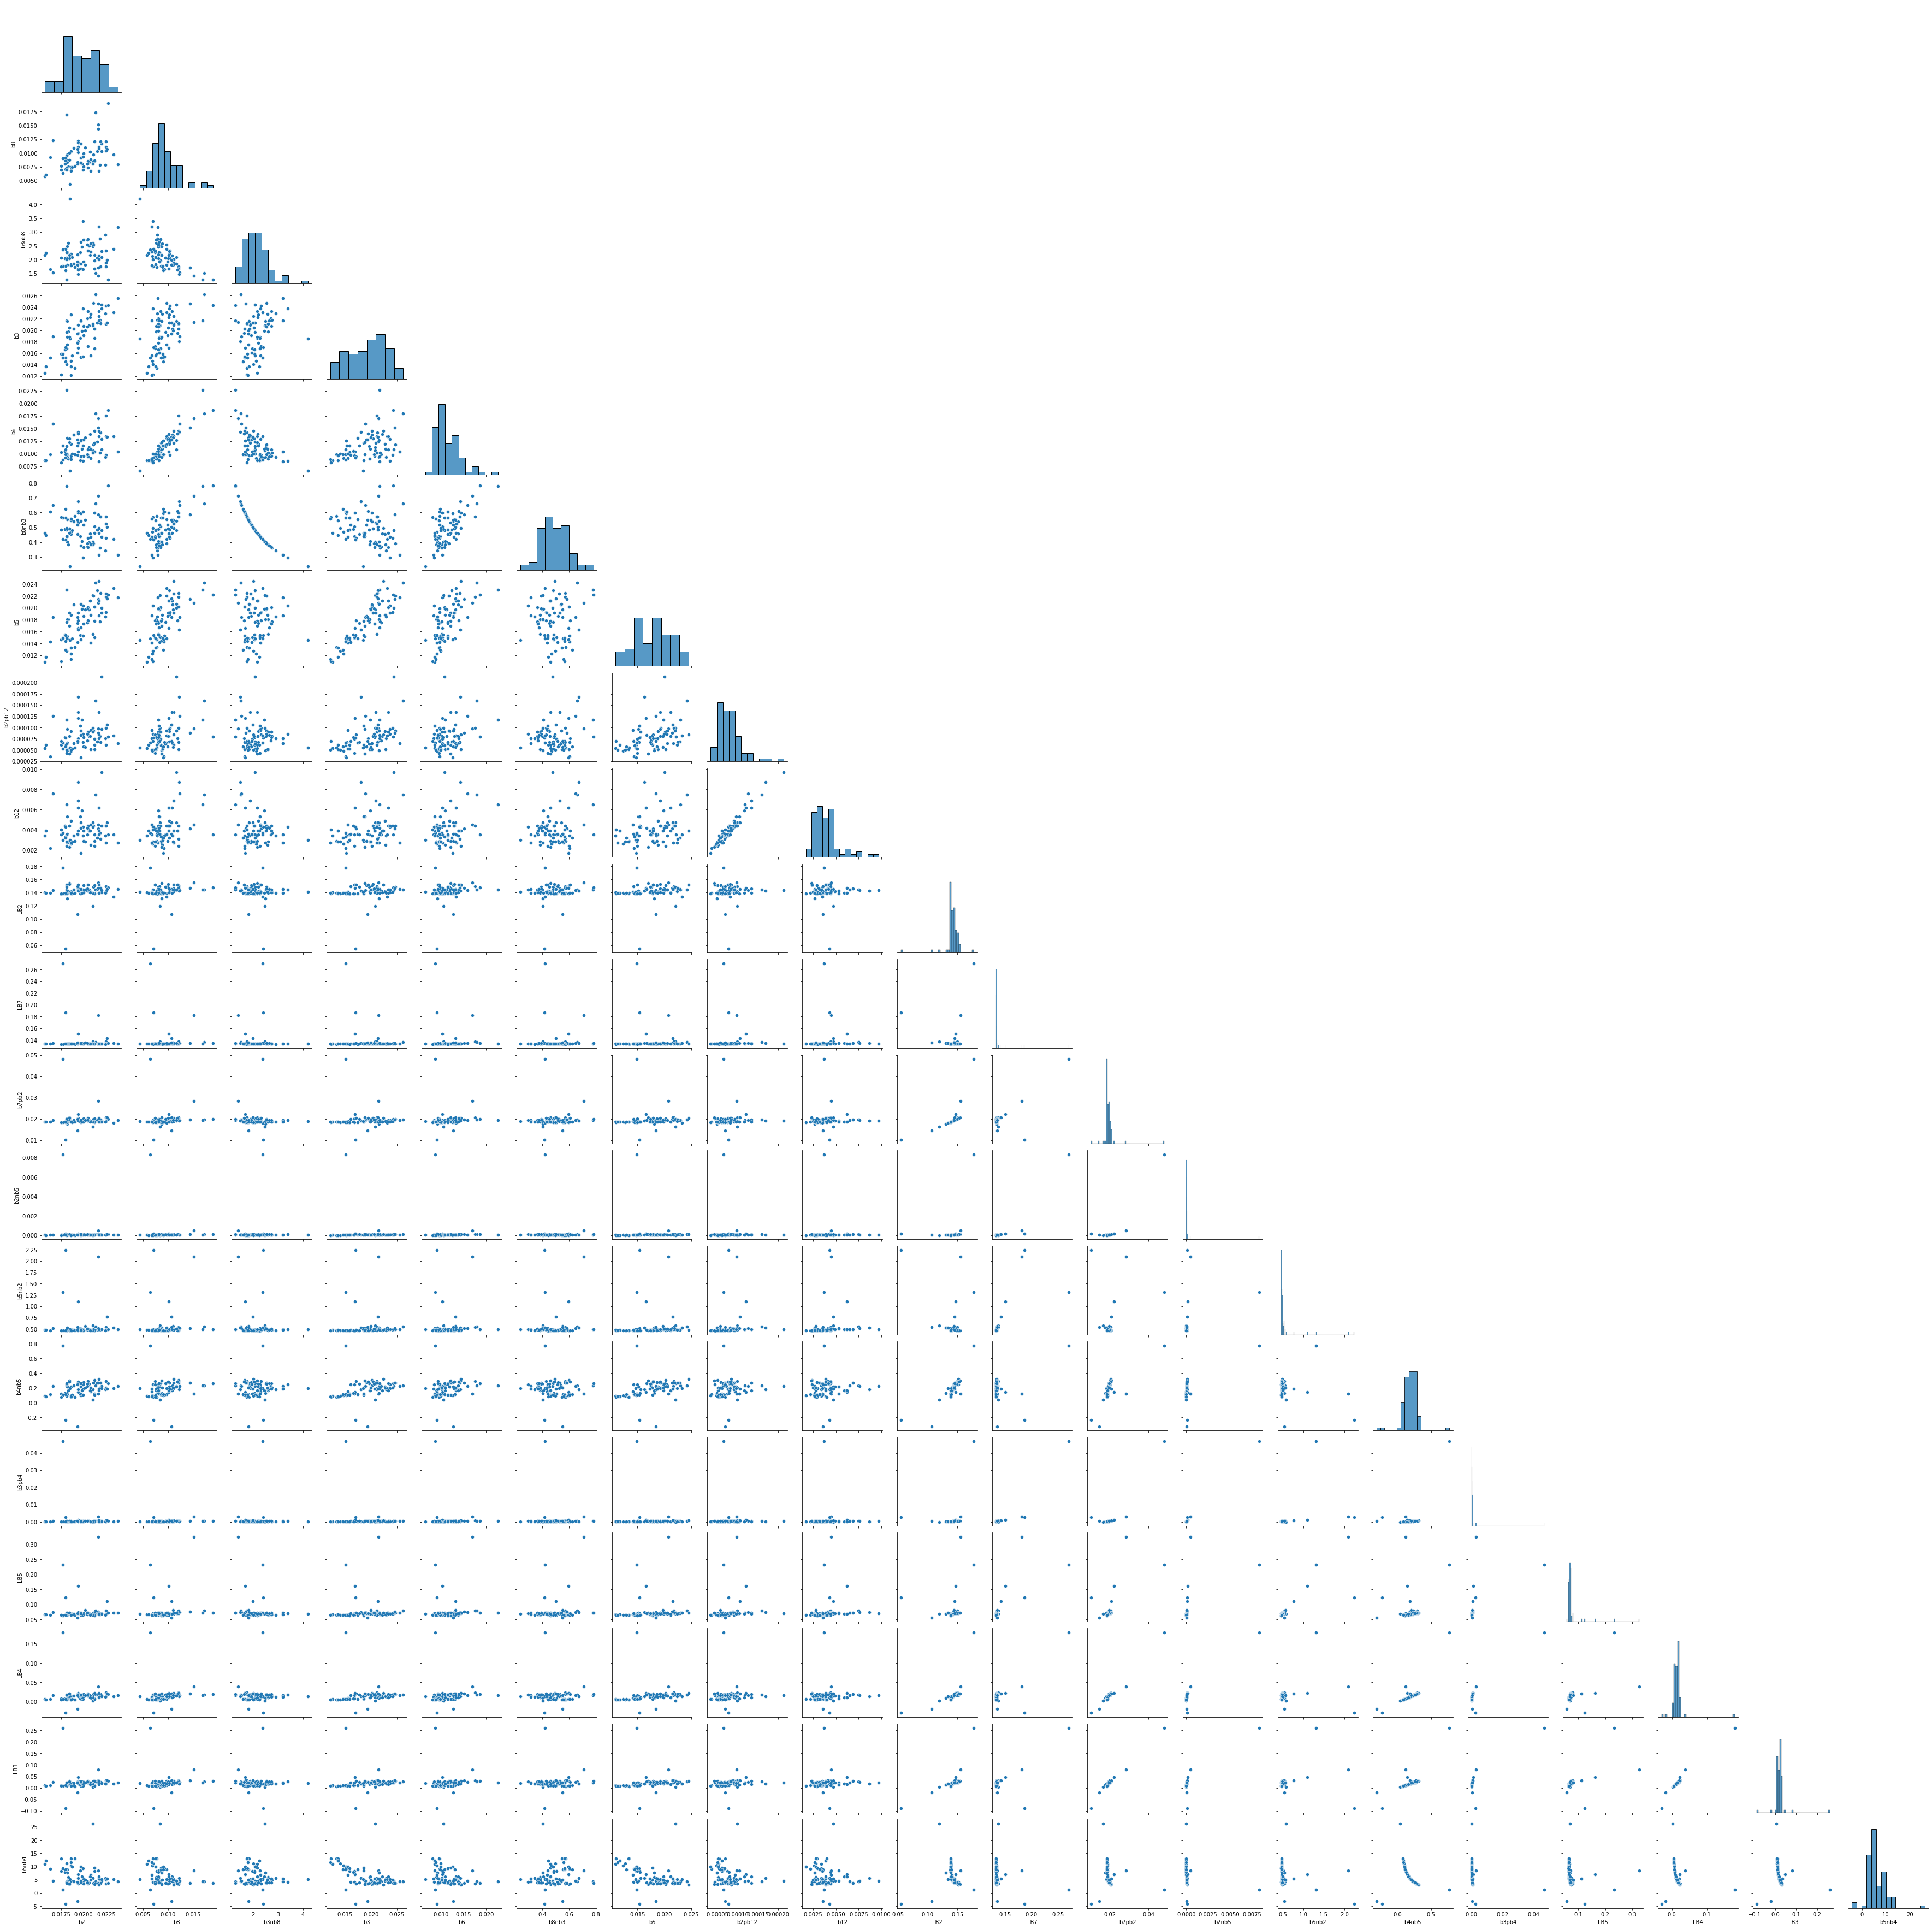

In [ ]:
sns.pairplot(dfx, corner = True);

# 2. Selección de variables

In [ ]:
dfy

,Log_amc,log_amb
0,1.428783,1.421275
1,1.363800,1.361728
2,1.368659,1.366610
3,1.489114,1.484727
4,1.109241,1.117271
...,...,...
75,1.431364,1.428297
76,1.300161,1.304275
77,1.303628,1.307710
78,1.278525,1.283301


In [ ]:
dfx


,b2,b8,b3nb8,b3,b6,b8nb3,b5,b2pb12,b12,LB2,LB7,b7pb2,b2nb5,b5nb2,b4nb5,b3pb4,LB5,LB4,LB3,b5nb4
0,0.0213,0.0173,1.514451,0.0262,0.0180,0.660305,0.0242,0.000160,0.0075,0.144656,0.136506,0.019746,0.000071,0.556845,0.230050,0.000493,0.080551,0.018531,0.026599,4.346878
1,0.0220,0.0117,2.085470,0.0244,0.0108,0.479508,0.0200,0.000213,0.0097,0.143863,0.133692,0.019233,0.000051,0.496607,0.224770,0.000356,0.071443,0.016058,0.022160,4.448984
2,0.0238,0.0080,3.187500,0.0255,0.0104,0.313725,0.0217,0.000064,0.0027,0.144939,0.133582,0.019361,0.000051,0.498524,0.225970,0.000354,0.072256,0.016328,0.021697,4.425360
3,0.0181,0.0169,1.284024,0.0217,0.0227,0.778802,0.0230,0.000118,0.0065,0.144090,0.133874,0.019290,0.000052,0.499424,0.228254,0.000361,0.071962,0.016426,0.021995,4.381093
4,0.0183,0.0076,2.605263,0.0198,0.0090,0.383838,0.0181,0.000051,0.0028,0.141711,0.133564,0.018927,0.000025,0.492075,0.164289,0.000176,0.069732,0.011456,0.015370,6.086841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0226,0.0107,1.990654,0.0213,0.0133,0.502347,0.0216,0.000106,0.0047,0.145033,0.142591,0.020680,0.000100,0.767974,0.186591,0.000688,0.111382,0.020783,0.033125,5.359317
76,0.0175,0.0070,1.757143,0.0123,0.0082,0.569106,0.0110,0.000070,0.0040,0.138540,0.133125,0.018443,0.000005,0.471904,0.076384,0.000038,0.065377,0.004994,0.007652,13.091832
77,0.0186,0.0068,1.794118,0.0122,0.0089,0.557377,0.0113,0.000050,0.0027,0.139219,0.133417,0.018574,0.000007,0.467118,0.086576,0.000048,0.065032,0.005630,0.008480,11.550496
78,0.0202,0.0110,1.818182,0.0200,0.0132,0.550000,0.0197,0.000057,0.0028,0.144241,0.135300,0.019516,0.000052,0.560605,0.202828,0.000360,0.080862,0.016401,0.021962,4.930290


## Selección de variables univariado*

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
# g1 = dinoflaglados + diatomeas + algas cafes (c/a)



variables = SelectKBest(score_func=mutual_info_regression, k=5)
variables.fit(dfx,dfy['Log_amc'])
print(variables.get_params)
dfx.columns[variables.get_support()]

<bound method BaseEstimator.get_params of SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7f433b733c20>)>


Index(['b3', 'b5', 'b4nb5', 'LB4', 'b5nb4'], dtype='object')

In [ ]:
# g2 = algas verdes + euglonofitas (b/a)


variables = SelectKBest(score_func=mutual_info_regression, k=5)
variables.fit(dfx,dfy['log_amb'])
print(variables.get_params)
dfx.columns[variables.get_support()]

<bound method BaseEstimator.get_params of SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7f433b733c20>)>


Index(['b3', 'b5', 'b4nb5', 'LB4', 'b5nb4'], dtype='object')

## Selección de variables con *Recursive Feature Elimination (RFE)*

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.linear_model import LogisticRegression

# g2 = algas verdes + euglonofitas (b/a)

rfe=RFE(estimator=LinearRegression(),n_features_to_select = 5, step = 1)
fit=rfe.fit(dfx,dfy['log_amb'])
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)


5
[ True False False  True False False  True  True  True False False False
 False False False False False False False False]
[ 1  8 15  1  9 14  1  1  1  6  5  4  2 12 13  3 10 11  7 16]


In [ ]:
# g1 = dinoflaglados + diatomeas + algas cafes (c/a)

rfe=RFE(estimator=LinearRegression(),n_features_to_select = 5, step = 1)
fit=rfe.fit(dfx,dfy['Log_amc'])
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)


5
[ True False False False False False False  True  True False False False
  True False False  True False False False False]
[ 1  9 15  3  8 14  2  1  1  6  5  4  1 12 13  1 10 11  7 16]


## Selección de variables con *Sequential Feature Selection* (SFS)
Este método utiliza validación cruzada y se desplaza hacia delante (*SFS-Forward*) o atras (*SFS-Backward*) para seleccionar las mejores variables. Inicia con cero variables y encuentra la que mejor optimiza la métrica de la validación cruzada, de esta forma selecciona esta variable y repite el procedimiento para la segunda y demas variables.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
# g2 = algas verdes + euglonofitas (b/a)

sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select = 5, cv =10, direction ='backward')
sfs_selector.fit(dfx, dfy['log_amb'])
dfx.columns[sfs_selector.get_support()]

Index(['b5', 'b7pb2', 'b5nb2', 'LB3', 'b5nb4'], dtype='object')

In [ ]:
# g1 = dinoflaglados + diatomeas + algas cafes (c/a)

sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select = 5, cv =10, direction ='backward')
sfs_selector.fit(dfx, dfy['Log_amc'])
dfx.columns[sfs_selector.get_support()]

Index(['b5', 'b7pb2', 'b5nb2', 'LB3', 'b5nb4'], dtype='object')

## Selección de variables con ELI5

In [ ]:
!pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 18.7 MB/s 
     |████████████████████████████████| 133 kB 47.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=af976f983adec794e07e752e9f3f3e3953dc9a4baf7c2e99dc964e986c562a24
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# g2 = algas verdes + euglonofitas (b/a)

model = LinearRegression()
model.fit(dfx,dfy['log_amb'])
perm = PermutationImportance(model).fit(dfx, dfy['log_amb'])
eli5.show_weights(model)

In [ ]:
# g1 = dinoflaglados + diatomeas + algas cafes (c/a)

model = LinearRegression()
model.fit(dfx,dfy['Log_amc'])
perm = PermutationImportance(model).fit(dfx, dfy['Log_amc'])
eli5.show_weights(model)

## Selección de variables con un modelo ensamblado

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 19.5 MB/s 


In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor

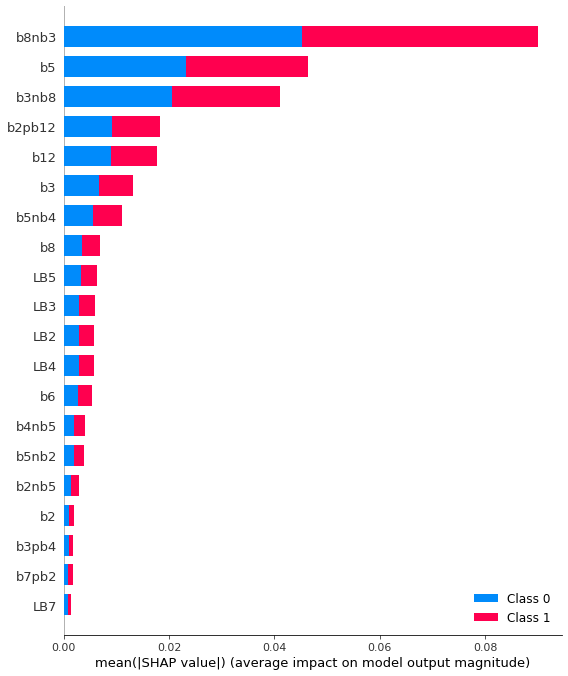

In [ ]:
model = RandomForestRegressor(max_depth=6, n_estimators=10)
model.fit(dfx, dfy_new)
shap_values = shap.TreeExplainer(model).shap_values(dfx)
shap.summary_plot(shap_values, dfx, plot_type="bar")

# Desbalanceo

In [ ]:
dfy_new.value_counts()

Log_amc   log_amb 
0.907949  0.915400    1
0.978637  0.987219    1
1.343999  1.346939    1
1.342423  1.346157    1
1.338855  1.343409    1
                     ..
1.278525  1.283075    1
1.278067  1.283075    1
1.275772  1.279667    1
1.275542  1.280123    1
1.524396  1.523356    1
Length: 80, dtype: int64

A continuación se utilizará el modelo de regresión lineal. Incialmente se utilizarán los datos actuales para conocer el ajuste del modelo ante un entrenamiento con datos desbalanceados.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter


In [ ]:


# g1 = dinoflaglados + diatomeas + algas cafes (c/a)

print('Original dataset shape %s' % Counter(dfy['Log_amc']))

X_train, X_test, y_train, y_test = train_test_split(dfx, dfy['Log_amc'], test_size=0.25) # Porcentaje de la base de datos que no se muestra
lr = LinearRegression()
results = cross_val_score(lr, X_train, y_train, cv=2, scoring='accuracy') # cv parte los datos en 5 grupos, cual es el mejor resultado de los 5 , accuracy es lo que acertó.
# print(Counter(y_test_pred))
print(results)
print(results.mean())

Original dataset shape Counter({1.2785249647370176: 2, 1.4287825114969546: 1, 1.3637999454791092: 1, 1.368658712392227: 1, 1.4891143693789193: 1, 1.1092409685882032: 1, 1.502836638621003: 1, 1.524396122103842: 1, 1.5156089492344802: 1, 1.4183012913197455: 1, 1.3498600821923312: 1, 1.0655797147284485: 1, 0.9079485216122722: 1, 0.9786369483844743: 1, 1.0038911662369105: 1, 1.0468851908377101: 1, 1.171141151028382: 1, 1.3935752032695876: 1, 1.13481437032046: 1, 1.1829849670035817: 1, 1.3244882333076564: 1, 1.3588862044058692: 1, 1.351216345339342: 1, 1.3368598209168094: 1, 1.2780673308886625: 1, 1.2909245593827543: 1, 1.3057811512549824: 1, 1.3102683666324475: 1, 1.3147096929551738: 1, 1.330210784571528: 1, 1.3439990690571613: 1, 1.338854746252323: 1, 1.2860071220794747: 1, 1.3151303171836017: 1, 1.3068537486930087: 1, 1.3126004392612594: 1, 1.0464951643347082: 1, 1.0993352776859577: 1, 1.3142886609474977: 1, 1.085290578230065: 1, 1.0722498976135149: 1, 1.1058506743851435: 1, 1.2435341018

In [ ]:
# g2 = algas verdes + euglonofitas (b/a)
print('Original dataset shape %s' % Counter(dfy['log_amb']))

X_train, X_test, y_train, y_test = train_test_split(dfx, dfy['log_amb'], test_size=0.25) # Porcentaje de la base de datos que no se muestra
lr = LinearRegression()
results = cross_val_score(lr, X_train, y_train, cv=2, scoring='accuracy') # cv parte los datos en 5 grupos, cual es el mejor resultado de los 5 , accuracy es lo que acertó.
# print(Counter(y_test_pred))
print(results)
print(results.mean())

Original dataset shape Counter({1.2830749747354715: 2, 1.4212747912103465: 1, 1.3617278360175928: 1, 1.3666097103924297: 1, 1.4847268042986619: 1, 1.1172712956557642: 1, 1.4970679363985049: 1, 1.5233562066547928: 1, 1.5089335260500327: 1, 1.4523998459114416: 1, 1.3529539117100877: 1, 1.0644579892269184: 1, 0.9153998352122699: 1, 0.9872192299080049: 1, 1.0098756337121602: 1, 1.0457140589408676: 1, 1.176958980586908: 1, 1.3930484664167782: 1, 1.145196406114182: 1, 1.1914510144648955: 1, 1.3316297176299323: 1, 1.3630475945210936: 1, 1.3543005623453597: 1, 1.3467440546048488: 1, 1.2960066693136723: 1, 1.3100557377508915: 1, 1.3147096929551736: 1, 1.3180633349627615: 1, 1.333648756514701: 1, 1.3469394626989906: 1, 1.3434085938038574: 1, 1.290479813330673: 1, 1.3228392726863212: 1, 1.3130231103232382: 1, 1.318897714627487: 1, 1.0519239160461065: 1, 1.1034616220947047: 1, 1.3161800988934527: 1, 1.0881360887005513: 1, 1.0755469613925308: 1, 1.1078880251827987: 1, 1.2477278329097232: 1, 1.22968

In [ ]:
# setting up testing and training sets

# g2 = algas verdes + euglonofitas (b/a)

X_train, X_test, y_train, y_test = train_test_split(sentinel1, dfy['log_amb'], test_size=0.3)
lr=LinearRegression()  # el class wigth es el hiperparametro
model=lr.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
print(y_test_pred)

[1.38825889 1.2778774  1.33358871 1.26602711 1.33785604 1.33582491
 1.40153936 1.22055321 1.26383022 1.24887846 1.28891539 1.34490192
 1.29543034 1.18492796 1.3453592  1.36181375 1.20773283 1.22856927
 1.32914889 1.28672445 1.32959343 1.32070785 1.33921792 1.29722288]


In [ ]:

# g1 = dinoflaglados + diatomeas + algas cafes (c/a)

X_train, X_test, y_train, y_test = train_test_split(sentinel1, dfy['Log_amc'], test_size=0.3)
lr=LinearRegression()  # el class wigth es el hiperparametro
model=lr.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
print(y_test_pred)

[1.33913593 1.13137331 1.15857032 1.33263578 1.20859041 1.46950368
 1.21947469 1.32005516 1.09851929 1.32935949 1.24967846 1.39557784
 1.31864588 1.23086455 1.25933965 1.21718902 1.29132508 1.38821024
 1.20407999 1.3591771  1.09496546 1.46160253 1.22076353 1.41849043]


# Validación cruzada

## Reflectancia con Sentinel 2A

In [ ]:
from sklearn.model_selection import train_test_split


# g2 = algas verdes + euglonofitas (b/a)


X_train,X_test, y_train,y_test = train_test_split(sentinel1,dfy['log_amb'], train_size=0.8, random_state=1) # RANDOM_STATE es para que de los mismos datos
X2_train,X2_test, y2_train,y2_test = train_test_split(sentinel1,dfy['log_amb'],train_size=0.8, random_state=1)  # train_size 
X3_train,X3_test, y3_train,y3_test = train_test_split(sentinel1,dfy['log_amb'], random_state=3)

In [ ]:
# g1 = dinoflaglados + diatomeas + algas cafes (c/a)

X_train_g1,X_test_g1, y_train_g1,y_test_g1 = train_test_split(sentinel1,dfy['Log_amc'], train_size=0.8, random_state=1) # RANDOM_STATE es para que de los mismos datos
X2_train_g1,X2_test_g1, y2_train_g1,y2_test_g1 = train_test_split(sentinel1,dfy['Log_amc'],train_size=0.8, random_state=1)  # train_size 
X3_train_g1,X3_test_g1, y3_train_g1,y3_test_g1 = train_test_split(sentinel1,dfy['Log_amc'], random_state=3)

In [ ]:
print('Dimensiones de la matriz para entrenar:',X_train_g1.shape)
print('Dimensiones del vector para entrenar:',y_train_g1.shape)
print('Dimensiones de la matriz para validar:',X_test_g1.shape)
print('Dimensiones del vector para validar:',y_test_g1.shape)

Dimensiones de la matriz para entrenar: (64, 9)
Dimensiones del vector para entrenar: (64,)
Dimensiones de la matriz para validar: (16, 9)
Dimensiones del vector para validar: (16,)


In [ ]:
np.array_equal(X_train,X2_train)

True

In [ ]:
LinearRegression().fit(X_train_g1,y_train_g1).score(X_test_g1,y_test_g1)

0.7924727506377796

In [ ]:
LinearRegression().fit(X_train,y_train).score(X_test,y_test)

0.7861845897300237

## Reflectancia con Landsat 8

In [ ]:



# g2 = algas verdes + euglonofitas (b/a)


X_train_ld,X_test_ld, y_train_ld,y_test_ld = train_test_split(landsat1,dfy['log_amb'], train_size=0.8, random_state=1) # RANDOM_STATE es para que de los mismos datos
X2_train_ld,X2_test_ld, y2_train_ld,y2_test_ld = train_test_split(landsat1,dfy['log_amb'],train_size=0.8, random_state=1)  # train_size 
X3_train_ld,X3_test_ld, y3_train_ld,y3_test_ld = train_test_split(landsat1,dfy['log_amb'], random_state=3)


# g1 = dinoflaglados + diatomeas + algas cafes (c/a)

X_train_g2,X_test_g2, y_train_g2,y_test_g2 = train_test_split(landsat1,dfy['Log_amc'], train_size=0.8, random_state=1) # RANDOM_STATE es para que de los mismos datos
X2_train_g2,X2_test_g2, y2_train_g2,y2_test_g2 = train_test_split(landsat1,dfy['Log_amc'],train_size=0.8, random_state=1)  # train_size 
X3_train_g2,X3_test_g2, y3_train_g2,y3_test_g2 = train_test_split(landsat1,dfy['Log_amc'], random_state=3)

In [ ]:
LinearRegression().fit(X_train_ld,y_train_ld).score(X_test_ld,y_test_ld)

-278.0153443535993

## Validación K-fold

## Reflectancia con Sentinel 2A

In [ ]:
kfold = KFold(n_splits=5, shuffle= True,random_state=1)  # Kfold siempre sirve para ver si el problema es de BIAS o de Varianza ;shuffle cada vez que saco datos revuelvo los datos
model = LinearRegression()
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())  # No tiene problema de varianza pero si BIAS

[ 0.48673341 -0.04446408  0.44653965 -0.79936737 -0.84277373]
-0.15066642408706318
0.5786256168457795


## Reflectancia con Landsat 8

In [ ]:
kfold = KFold(n_splits=5, shuffle= True,random_state=1)  # Kfold siempre sirve para ver si el problema es de BIAS o de Varianza ;shuffle cada vez que saco datos revuelvo los datos
model = LinearRegression()
results = cross_val_score(model, X_train_ld, y_train, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())  # No tiene problema de varianza pero si BIAS

[ 3.39016235e-01  1.78691331e-01  1.83637931e-01 -6.51086320e+03
 -3.22254068e-01]
-1302.0968214997945
2604.3831982554984


## Corrida de validación cruzada

In [ ]:
# Sentinel 2A   --  g2 = algas verdes + euglonofitas (b/a)


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.linear_model import Ridge

# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

In [ ]:
# Sentinel 2A   --  g2 = algas verdes + euglonofitas (b/a)

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-0.1048048  -0.08830584 -0.11509319 -0.12347571 -0.137599  ]
Média métricas de validación cruzada: -0.1138557080902279


In [ ]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-0.08426116 -0.10302586 -0.13134255 -0.11242855 -0.15348584 -0.17063397
 -0.102611   -0.08639491 -0.094579   -0.14702574 -0.13169272 -0.11129434
 -0.07052968 -0.14767365 -0.1076629  -0.10999974 -0.14325592 -0.12097836
 -0.13471017 -0.10518597 -0.0753363  -0.12092983 -0.12535443 -0.13042319
 -0.12292821]

Média métricas de validación cruzada: -0.11774975960923097


In [ ]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.009836,0.003253,-0.081733,0.391550,-0.104944,-0.112710
1,0.005631,0.002713,0.002293,0.414898,-0.139895,-0.094777
2,0.005313,0.002682,-0.046126,0.514421,-0.145925,-0.085439
3,0.005075,0.002682,-0.079031,0.495602,-0.146131,-0.087297
4,0.004864,0.003036,0.412740,0.311695,-0.096686,-0.110323
5,0.004769,0.002644,0.035931,0.447807,-0.117384,-0.100785
6,0.004794,0.003069,0.065668,0.362579,-0.140622,-0.090502
7,0.005098,0.002702,0.339362,0.337072,-0.097462,-0.108882
8,0.004773,0.002645,-0.628653,0.532883,-0.135678,-0.095756
9,0.004843,0.002643,-0.611798,0.589144,-0.137356,-0.090070


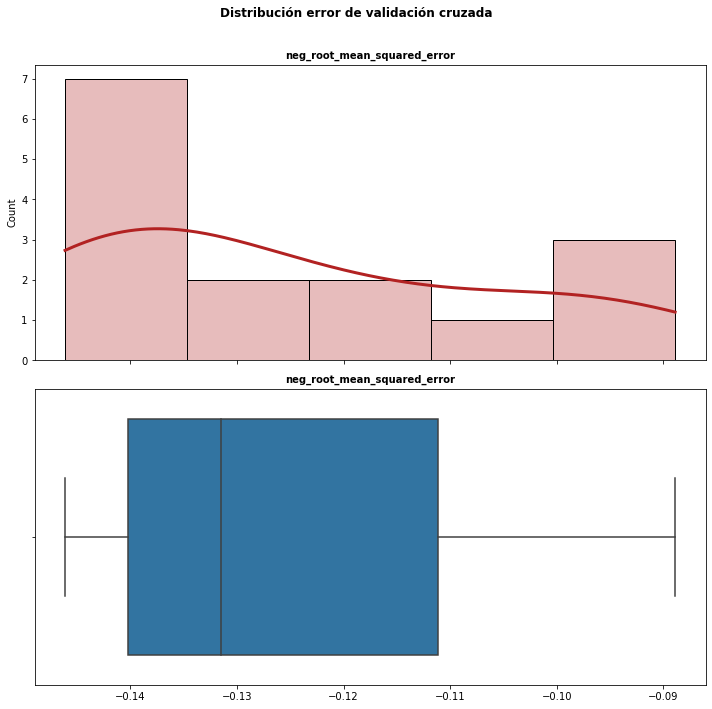

In [ ]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

sns.histplot(
    data    = cv_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 3},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('neg_root_mean_squared_error', fontsize = 10, fontweight = "bold")
axes[0].tick_params(labelsize = 10)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 10, fontweight = "bold")
axes[1].tick_params(labelsize = 10)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 12,
             fontweight = "bold");

# Selección de hiperparametros

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter("ignore")

In [ ]:
results=cross_validate(KNeighborsRegressor(n_neighbors=10), sentinel1, dfy['Log_amc'], cv=5)
results

{'fit_time': array([0.00370479, 0.00240517, 0.00222802, 0.00289607, 0.00293374]),
 'score_time': array([0.00537443, 0.00232172, 0.00428557, 0.00323033, 0.00327277]),
 'test_score': array([ 0.00888161, -0.3876907 , -0.5983778 , -1.11877428,  0.40448679])}

In [ ]:
results['test_score'].mean()

-0.3382948770007004

In [ ]:
k = np.arange(2,100,2)
k

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [ ]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(), sentinel1, dfy['log_amb'], param_name='n_neighbors', param_range=k, cv=6)

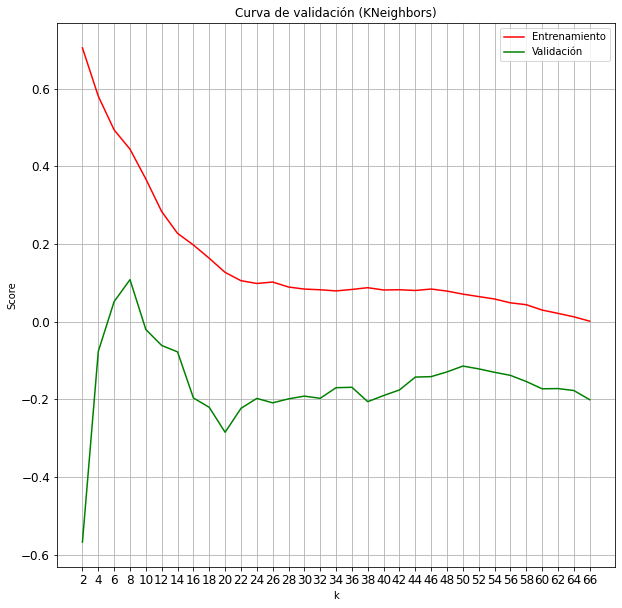

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Curva de validación (KNeighbors)")    
plt.xlabel("k" )
plt.tick_params(labelsize = 12)
plt.ylabel("Score")
plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento", color='red')
plt.plot(np.mean(test_scores,axis=1),label="Validación", color='green')
#plt.ylim(0, 1)
plt.xticks(np.arange(33),k)
plt.legend(loc="best")
plt.grid(True);

### Curva yellowbrick

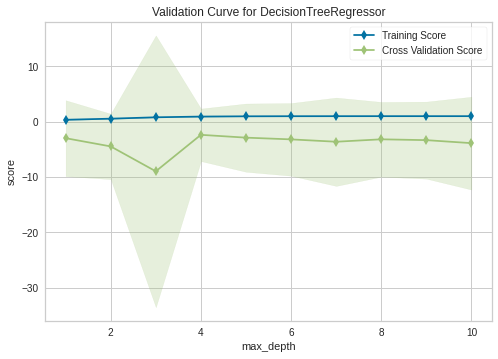

In [ ]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=20, scoring="r2")
viz.fit(sentinel1, dfy['Log_amc'])
viz.show();

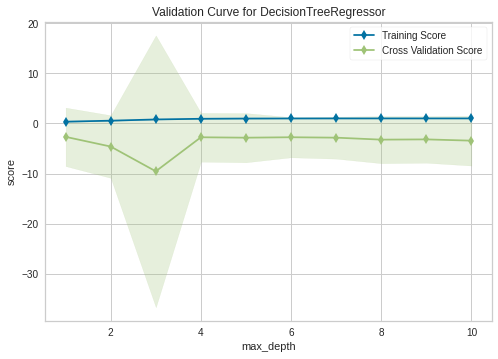

In [ ]:
viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=20, scoring="r2")
viz.fit(sentinel1, dfy['log_amb'])
viz.show();

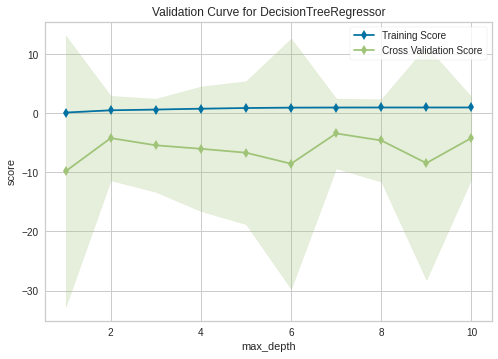

In [ ]:
# Landsat 8

viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=20, scoring="r2")
viz.fit(landsat1, dfy['log_amb'])
viz.show();

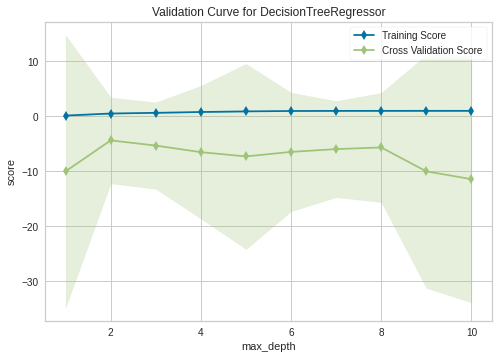

In [ ]:
# Landsat 8

viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=20, scoring="r2")
viz.fit(landsat1, dfy['Log_amc'])
viz.show();

## Grid Search
El *Grid search* es un método para ajustar los parámetros que consiste en crear y evaluar un modelo metódicamente  para cada combinación de hiperparámetros especificados en la grilla de búsqueda definida.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(sentinel1, dfy['Log_amc'])
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-0.3344962150211484
10.0


In [ ]:
alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(sentinel1, dfy['log_amb'])
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-0.4034943391279605
0.001


In [ ]:
# Landsat 8
alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(landsat1, dfy['log_amb'])
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-0.3174120746418504
0.001


In [ ]:
# Landsat 8
alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(landsat1, dfy['log_amb'])
print(grid.best_score_)
print(grid.best_estimator_.alpha)

### Hiperparametros 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
15,3,-0.112593,0.042448,-0.081852,0.010785


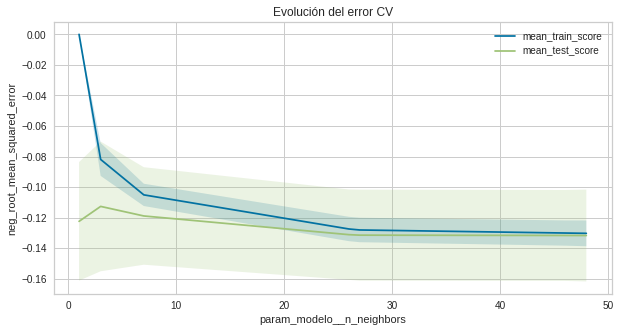

In [ ]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 5))
hiperparametro = 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

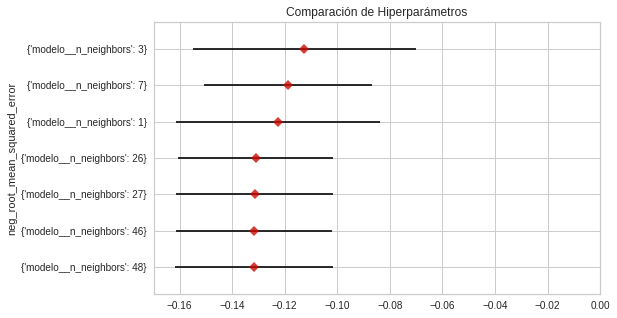

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

resultados = resultados.sort_values('mean_test_score', ascending = True)

ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_ylabel(metrica);


# Metricas

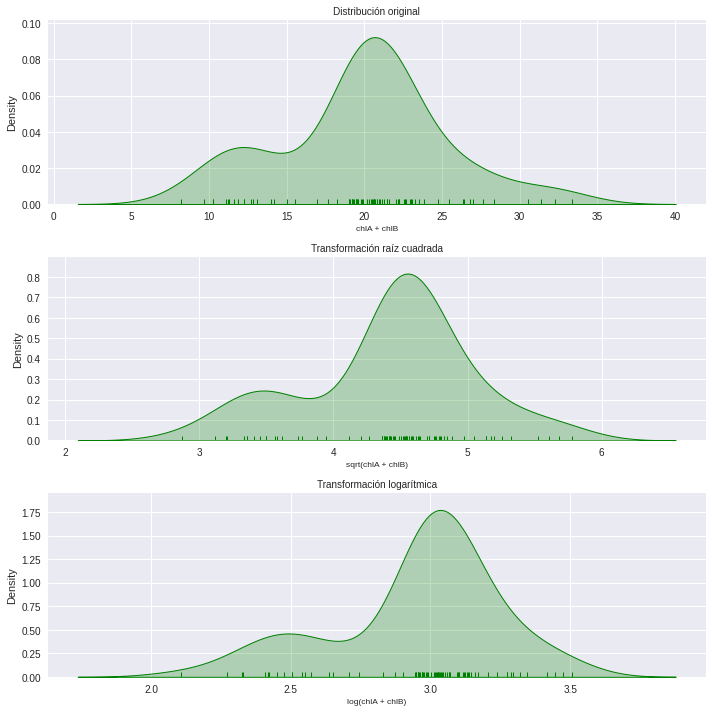

In [ ]:
# g2 = algas verdes + euglonofitas (b/a)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
sns.distplot(
    y_bruta.amb,
    hist    = False,
    rug     = True,
    color   = "green",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('chlA + chlB', fontsize='small') 
axes[0].tick_params(labelsize = 10)

sns.distplot(
    np.sqrt(y_bruta.amb),
    hist    = False,
    rug     = True,
    color   = "green",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(chlA + chlB)', fontsize='small') 
axes[1].tick_params(labelsize = 10)

sns.distplot(
    np.log(y_bruta.amb),
    hist    = False,
    rug     = True,
    color   = "green",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(chlA + chlB)', fontsize='small') 
axes[2].tick_params(labelsize = 10)

fig.tight_layout()

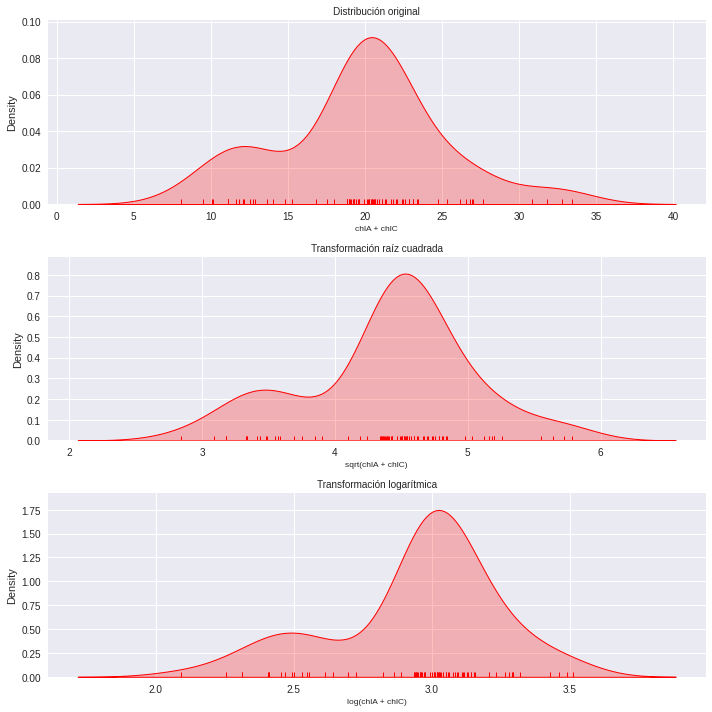

In [ ]:
# g1 = dinoflaglados + diatomeas + algas cafes (c/a)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
sns.distplot(
    y_bruta.amc,
    hist    = False,
    rug     = True,
    color   = "red",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('chlA + chlC', fontsize='small') 
axes[0].tick_params(labelsize = 10)

sns.distplot(
    np.sqrt(y_bruta.amc),
    hist    = False,
    rug     = True,
    color   = "red",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(chlA + chlC)', fontsize='small') 
axes[1].tick_params(labelsize = 10)

sns.distplot(
    np.log(y_bruta.amc),
    hist    = False,
    rug     = True,
    color   = "red",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(chlA + chlC)', fontsize='small') 
axes[2].tick_params(labelsize = 10)

fig.tight_layout()

In [ ]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(dfx, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:01<00:00,  5.95it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,2.434399,1847.560100,-10366.138969,inf,0.291946,2.679527e-121
logistic,2.542027,5101.571442,-10296.920159,inf,0.389964,1.209059e-219
gamma,3.195085,4692.035948,-9923.699164,inf,0.358536,1.209969e-184
chi2,3.208776,4574.851292,-9916.857734,inf,0.358917,4.775132e-185
beta,3.243497,4248.203572,-9892.260092,inf,0.363894,2.258528e-190
norm,3.543868,7422.618406,-9765.308784,inf,0.374504,5.264476e-202
expon,4.219632,962.190851,-9486.062138,inf,0.585975,0.000000e+00
powerlaw,4.286996,724.260491,-9453.342893,inf,0.529732,0.000000e+00
exponpow,5.169383,1405.045370,-9153.875528,inf,0.926658,0.000000e+00


In [ ]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(dfy, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=2, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00,  9.85it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,260.858069,83.197813,88.358771,inf,0.108557,0.042629
logistic,397.678978,12.805316,155.825752,inf,0.170477,0.000155


In [ ]:
dfx.select_dtypes(include=['float64', 'int']).describe()

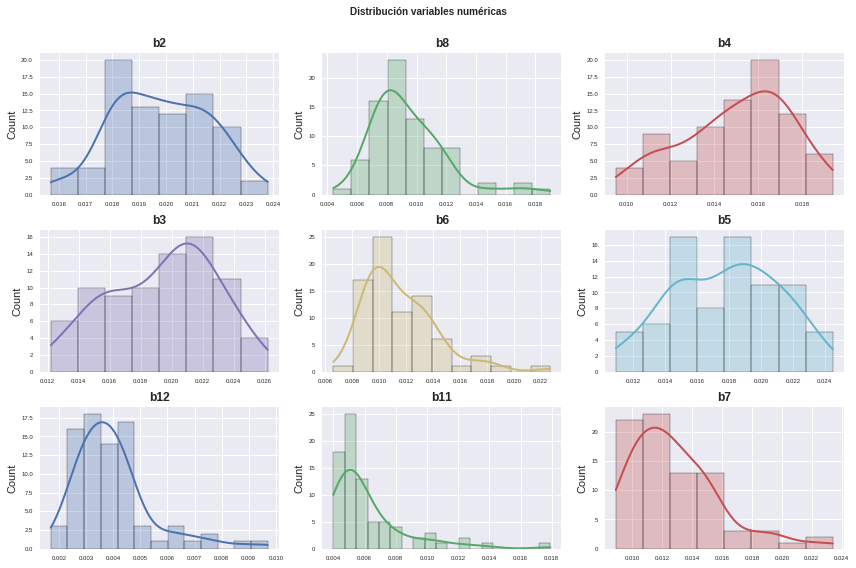

In [ ]:
# Gráfico de distribución para valores de sentinel
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_numeric = sentinel.select_dtypes(include=['float64', 'int']).columns
# columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = sentinel,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

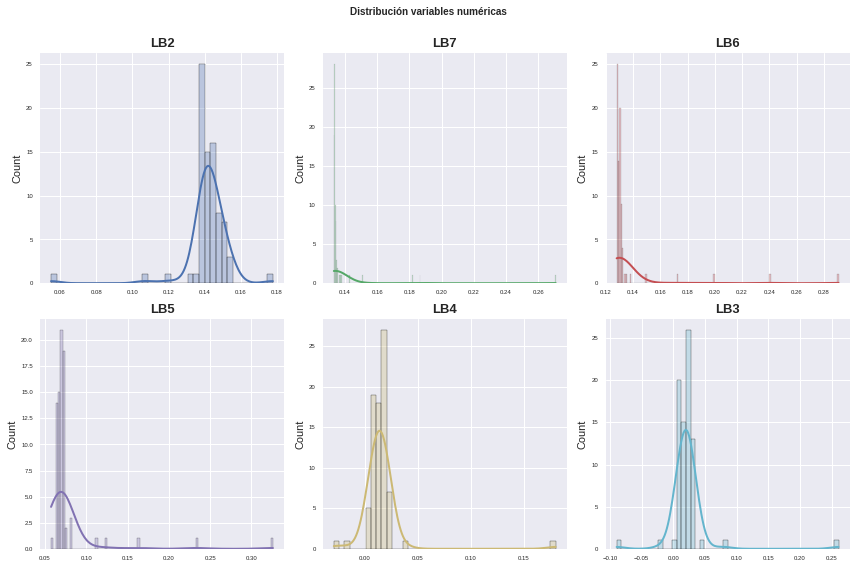

In [ ]:
# Gráfico de distribución para valores de Landsat 8
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flat
columnas_numeric = landsat.select_dtypes(include=['float64', 'int']).columns
# columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = landsat,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 13, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### Mean Absolute Error
El error medio absoluto (MAE) es la suma de las diferencias absolutas entre las predicciones y las observaciones. Da una idea de que tan equivocado puede estar el modelo, define la magnitud pero no la direccion, (*over* o *under fitting*)

In [ ]:
# Sentinel 2A


kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, sentinel1, dfy['Log_amc'], cv=kfold, scoring='neg_mean_absolute_error')
print(results)
print(results.mean())
print(results.std())


kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, sentinel1, dfy['log_amb'], cv=kfold, scoring='neg_mean_absolute_error')
print(results)
print(results.mean())
print(results.std())

[-0.16620675 -0.06178649 -0.10016349 -0.0697652  -0.05783321]
-0.09115102698217184
0.04035912057692873
[-0.16482521 -0.06187319 -0.09910286 -0.06837314 -0.0560556 ]
-0.09004599933834774
0.04023114324405097


In [ ]:
# Landsat 8


kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, landsat1, dfy['Log_amc'], cv=kfold, scoring='neg_mean_absolute_error')
print(results)
print(results.mean())
print(results.std())


kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, landsat1, dfy['log_amb'], cv=kfold, scoring='neg_mean_absolute_error')
print(results)
print(results.mean())
print(results.std())

[-0.21405231 -0.04765965 -0.06569509 -2.40325692 -0.17347325]
-0.5808274441867276
0.9133827096029686
[-0.20718314 -0.04751024 -0.06447936 -2.25207739 -0.16974678]
-0.5481993829678855
0.8540952395751739


### Mean Squared Error
El error medio cuadrático (MSE) es mas como el error medio absoluto ya qu da una idea de la magnitud del error en las unidades del problema, tambien es denominado *Root Mean Squared Error -RMSE-*.

In [ ]:
# Sentinel 2A

kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, sentinel1, dfy['log_amb'], cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())
print(results.std())


kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, sentinel1, dfy['Log_amc'], cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())
print(results.std())


# Landsat 8

kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, landsat1, dfy['log_amb'], cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())
print(results.std())


kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, landsat1, dfy['Log_amc'], cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())
print(results.std())

-0.01465907594656215
0.011747344146842495
-0.015197044597021082
0.012218194176380858
-8.386647066069397
16.64864783673568
-9.463447980809017
18.79249001405811


### R2 Metric

In [ ]:
# Sentinel 2A

kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, sentinel1, dfy['log_amb'], cv=kfold, scoring='r2')
print(results.mean())
print(results.std())


kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, sentinel1, dfy['Log_amc'], cv=kfold, scoring='r2')
print(results.mean())
print(results.std())

# Landsat 8

kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, landsat1, dfy['log_amb'], cv=kfold, scoring='r2')
print(results.mean())
print(results.std())


kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, landsat1, dfy['Log_amc'], cv=kfold, scoring='r2')
print(results.mean())
print(results.std())



-0.7114843935756177
1.3471970588361886
-0.6796227294643877
1.2712537504757326
-4201.064321339454
8395.619325035545
-4407.050189276977
8807.394495160454


# Curva de aprendizaje (*Learning curve*)

In [ ]:
from sklearn.model_selection import learning_curve

# Sentinel 2A  g2 = algas verdes + euglonofitas (b/a)

lc = learning_curve(KNeighborsRegressor(n_neighbors=7),X_train,y_train,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
lc

(array([ 5, 16, 28, 39, 51]),
 array([[       nan,        nan,        nan,        nan,        nan],
        [0.06594374, 0.28284627, 0.31635657, 0.31635657, 0.31635657],
        [0.09635661, 0.17580942, 0.2069108 , 0.26137849, 0.26137849],
        [0.2176057 , 0.39564691, 0.42374664, 0.2014239 , 0.2014239 ],
        [0.35267965, 0.42974469, 0.48609511, 0.31218191, 0.37138135]]),
 array([[            nan,             nan,             nan,
                     nan,             nan],
        [-5.48166324e-01,  1.32900767e-04, -2.64371327e-01,
          8.70546140e-02, -5.72546386e-02],
        [-4.14166536e-01,  3.18485784e-02, -1.90347964e-01,
          1.09145232e-01, -1.35578036e-02],
        [-2.47105608e-01,  2.49248595e-01,  1.74055179e-02,
          1.56801203e-01,  1.33833439e-02],
        [-2.96504008e-01,  3.75566278e-01,  9.07759700e-02,
          3.43291403e-01,  2.10681799e-01]]))

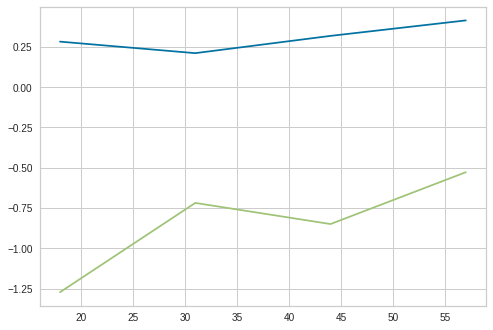

In [ ]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:]);

In [ ]:
# Sentinel 2A  g1 = dinoflaglados + diatomeas + algas cafes (c/a)

lc_1 = learning_curve(KNeighborsRegressor(n_neighbors=15),X_train_g1,y_train_g1,cv=5)
samples, train_g1, test_g1 = lc_1[0], lc_1[1], lc_1[2]
lc_1

(array([ 5, 16, 28, 39, 51]),
 array([[        nan,         nan,         nan,         nan,         nan],
        [ 0.06084314, -0.01580774,  0.007987  ,  0.007987  ,  0.007987  ],
        [-0.00287299, -0.04016649,  0.0154675 ,  0.06442507,  0.06442507],
        [ 0.06574873,  0.11356904,  0.13164321,  0.03397957,  0.03397957],
        [ 0.04732568,  0.08357301,  0.10729878,  0.02045546,  0.1016279 ]]),
 array([[        nan,         nan,         nan,         nan,         nan],
        [-0.27375383, -0.27007056, -0.22207365,  0.01635433, -0.11940997],
        [-0.52014498,  0.0675602 , -0.01738135, -0.07529404, -0.0095547 ],
        [-0.06337459, -0.01382677, -0.25965335, -0.03526213, -0.05792168],
        [ 0.01989819,  0.07556273, -0.29711984, -0.02103734, -0.04551487]]))

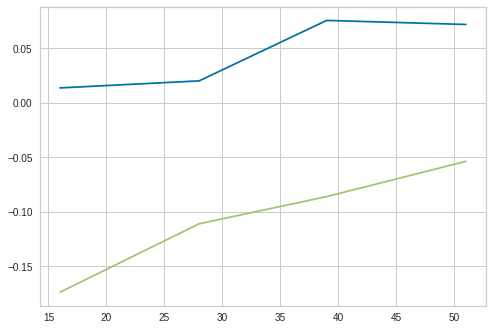

In [ ]:
plt.plot(samples[1:],np.mean(train_g1,axis=1)[1:])
plt.plot(samples[1:],np.mean(test_g1,axis=1)[1:]);

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [ ]:
# Sentinel 2A  g1 = dinoflaglados + diatomeas + algas cafes (c/a)

estimator = LinearRegression()
cv = ShuffleSplit(n_splits=40, test_size=0.2) # separe  en 100 pedazos , 99 para entrenar y 1 para test
train_sizes, train_scores, test_scores = learning_curve(estimator, sentinel1, dfy['Log_amc'], cv=cv, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 5))  #el algoritmo separa el mismo en train y test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

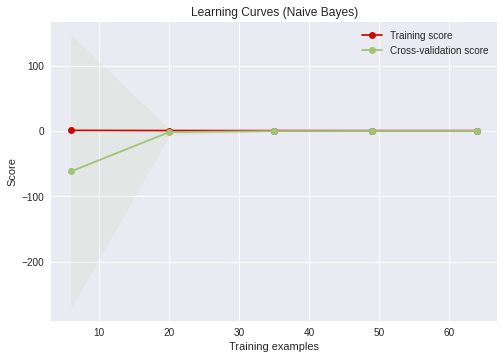

In [ ]:
plt.figure()   #con 40 datos ya aprende bien
plt.title("Learning Curves (Naive Bayes)")    
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best");

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.00001)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator, dfx, dfy['log_amb'], cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Cluster

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [ ]:
km = KMeans(n_clusters=4)
model=km.fit(sentinel1)
y_kmeans=model.fit_predict(sentinel1)

In [ ]:
y_kmeans

array([1, 0, 3, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 1, 3, 2, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 3, 0, 1, 1,
       3, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
centroids = model.cluster_centers_
print(centroids)
print('número de datos asignados a cada centroide:')
print(np.bincount(y_kmeans))

[[1.96103448e-02 8.77931034e-03 2.13750433e+00 1.87241379e-02
  1.10379310e-02 4.69235319e-01 1.70896552e-02 8.00151724e-05
  4.03103448e-03]
 [1.95586207e-02 1.12103448e-02 1.68467896e+00 1.85517241e-02
  1.33275862e-02 5.99808859e-01 1.78103448e-02 8.03031034e-05
  4.11379310e-03]
 [2.02777778e-02 8.17777778e-03 2.58048691e+00 2.11000000e-02
  1.02388889e-02 3.88683266e-01 1.86333333e-02 7.89255556e-05
  3.88888889e-03]
 [2.09750000e-02 6.55000000e-03 3.49223405e+00 2.23500000e-02
  8.50000000e-03 2.90071508e-01 1.88500000e-02 7.03200000e-05
  3.37500000e-03]]
número de datos asignados a cada centroide:
[29 29 18  4]


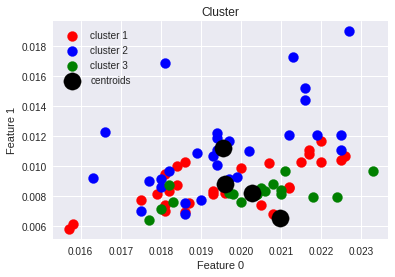

In [ ]:
sentinel1=np.array(sentinel1)
plt.scatter(sentinel1[y_kmeans==0,0],sentinel1[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(sentinel1[y_kmeans==1,0],sentinel1[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(sentinel1[y_kmeans==2,0],sentinel1[y_kmeans==2,1],s=100,c='green',label='cluster 3')
# plt.scatter(sentinel1[y_kmeans==3,0],sentinel1[y_kmeans==3,1],s=100,c='yellow',label='cluster 4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='black', label='centroids')
plt.title('Cluster')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend();

## *Elbow curve*

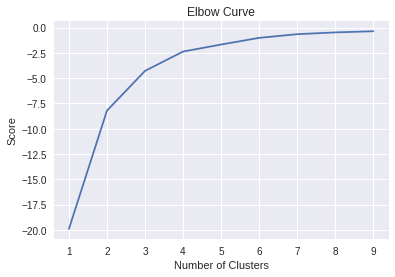

In [ ]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(sentinel1).score(sentinel1) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve');

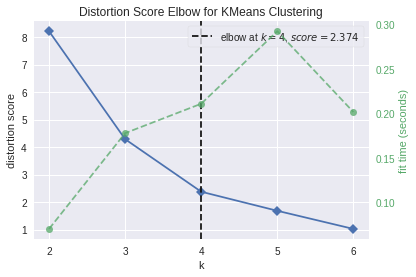

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(sentinel1)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

## Análisis *Silhouette*

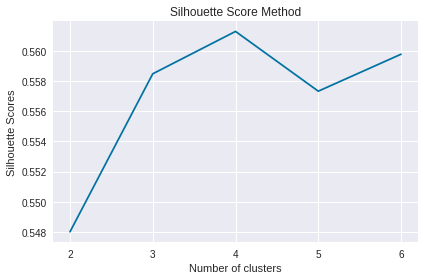

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(sentinel1)
    silhouette_scores.append(silhouette_score(sentinel1, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5480064827678881
For n_clusters = 3 The average silhouette_score is : 0.5584855328163307
For n_clusters = 4 The average silhouette_score is : 0.5612963354219852
For n_clusters = 5 The average silhouette_score is : 0.5573328847460395
For n_clusters = 6 The average silhouette_score is : 0.5597839348126332


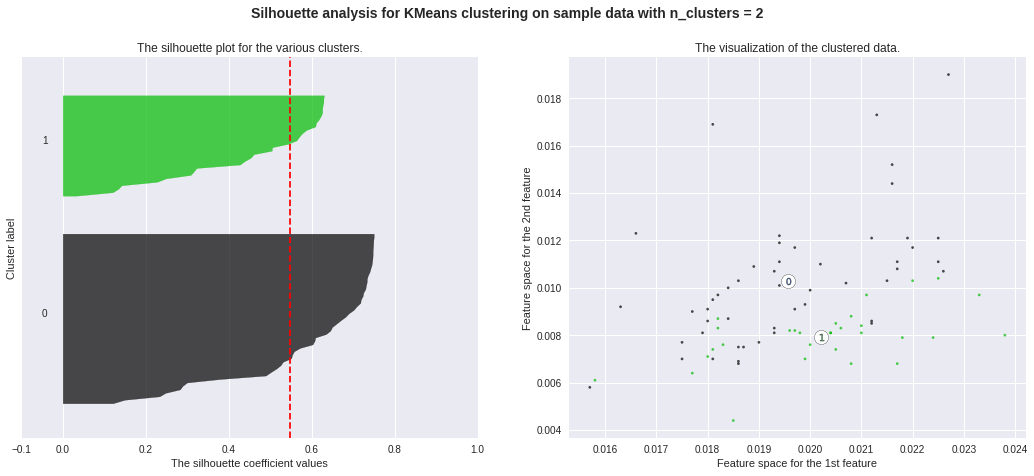

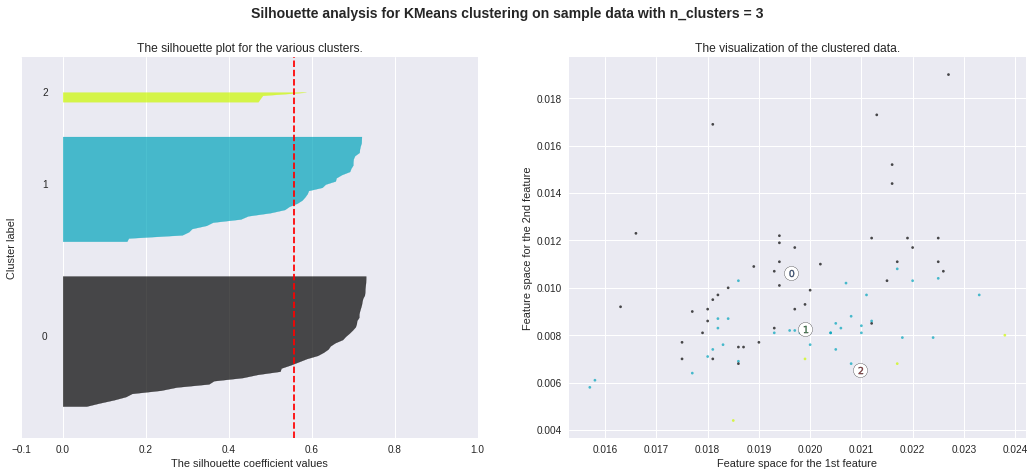

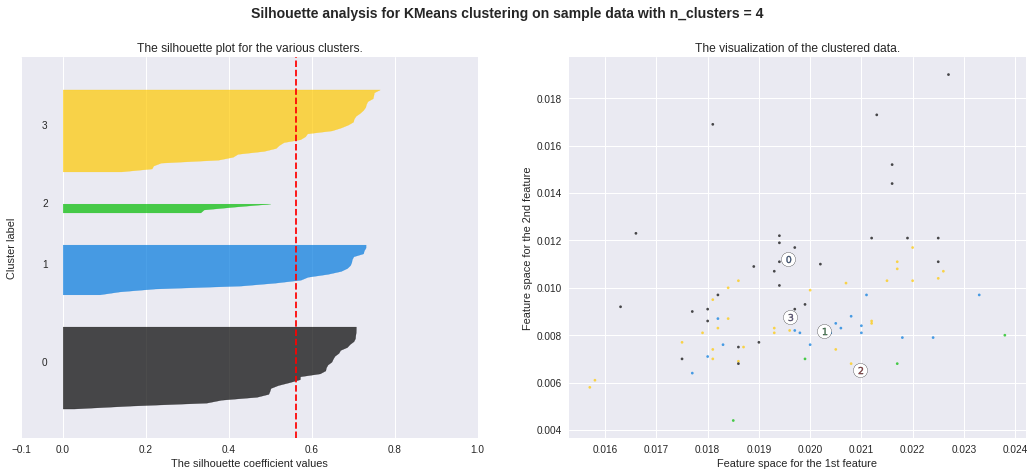

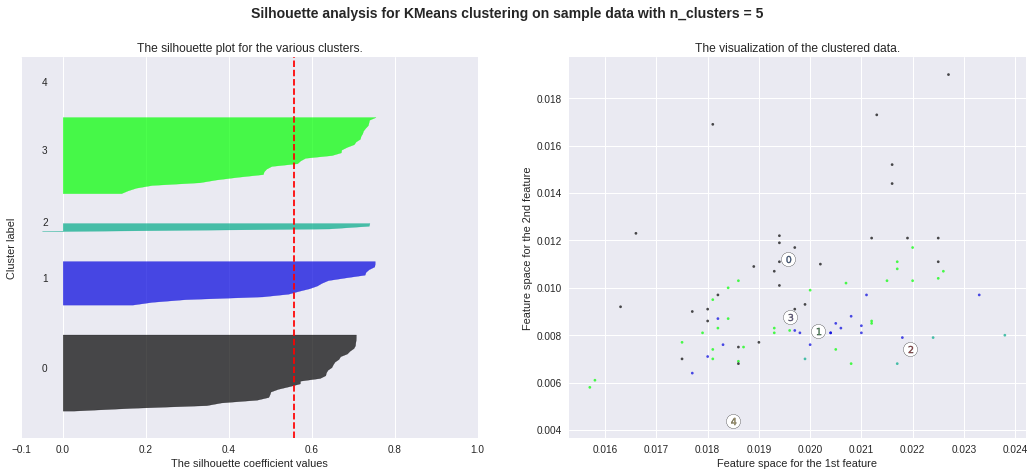

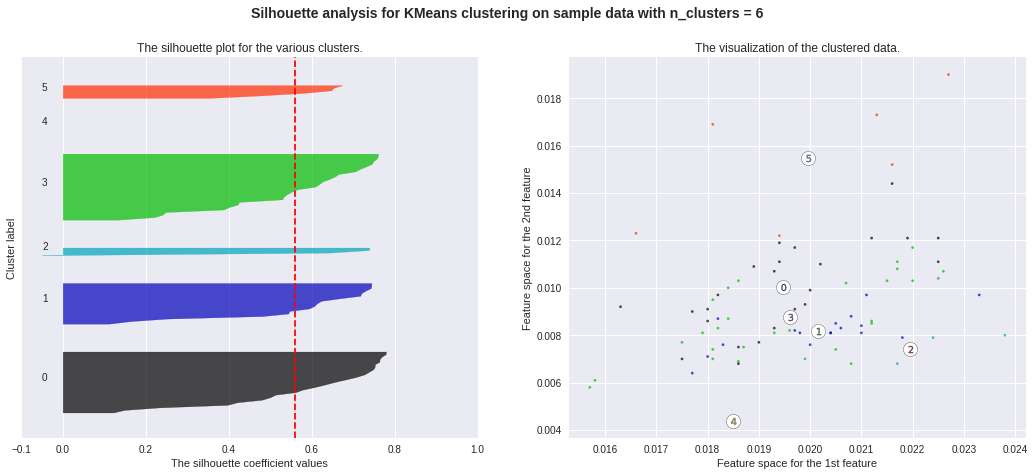

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(sentinel1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(sentinel1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(sentinel1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(sentinel1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(sentinel1[:, 0], sentinel1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Analisis de Componentes principales

## Sentinel 2A

In [ ]:
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
sentinel1

,b2,b8,b3nb8,b3,b6,b8nb3,b5,b2pb12,b12
0,0.0213,0.0173,1.514451,0.0262,0.0180,0.660305,0.0242,0.000160,0.0075
1,0.0220,0.0117,2.085470,0.0244,0.0108,0.479508,0.0200,0.000213,0.0097
2,0.0238,0.0080,3.187500,0.0255,0.0104,0.313725,0.0217,0.000064,0.0027
3,0.0181,0.0169,1.284024,0.0217,0.0227,0.778802,0.0230,0.000118,0.0065
4,0.0183,0.0076,2.605263,0.0198,0.0090,0.383838,0.0181,0.000051,0.0028
...,...,...,...,...,...,...,...,...,...
75,0.0226,0.0107,1.990654,0.0213,0.0133,0.502347,0.0216,0.000106,0.0047
76,0.0175,0.0070,1.757143,0.0123,0.0082,0.569106,0.0110,0.000070,0.0040
77,0.0186,0.0068,1.794118,0.0122,0.0089,0.557377,0.0113,0.000050,0.0027
78,0.0202,0.0110,1.818182,0.0200,0.0132,0.550000,0.0197,0.000057,0.0028


In [ ]:
scaler=StandardScaler()
ld=scaler.fit(sentinel1)
X_scaled1=ld.transform(sentinel1)
columnas = sentinel1.columns
X_scaled = pd.DataFrame(X_scaled1, columns=columnas)
X_scaled

,b2,b8,b3nb8,b3,b6,b8nb3,b5,b2pb12,b12
0,0.835334,3.117817,-1.283986,1.991621,2.379607,1.645659,1.921569,2.688663,2.458629
1,1.227773,0.903865,-0.113354,1.466166,-0.281340,-0.096124,0.663243,4.483661,4.002399
2,2.236901,-0.558924,2.145889,1.787278,-0.429170,-1.693259,1.172566,-0.506200,-0.909596
3,-0.958672,2.959677,-1.756378,0.677983,4.116614,2.787243,1.562048,1.280099,1.756915
4,-0.846546,-0.717063,0.952260,0.123336,-0.946576,-1.017798,0.094000,-0.941818,-0.839425
...,...,...,...,...,...,...,...,...,...
75,1.564149,0.508517,-0.307734,0.561215,0.642600,0.123907,1.142605,0.897679,0.493831
76,-1.295048,-0.954272,-0.786449,-2.066061,-1.242237,0.767050,-2.033171,-0.314154,0.002631
77,-0.678358,-1.033342,-0.710648,-2.095253,-0.983534,0.654058,-1.943290,-0.975945,-0.909596
78,0.218644,0.627122,-0.661315,0.181720,0.605643,0.582988,0.573362,-0.763824,-0.839425


In [ ]:
n = len(columnas)  # número de features
pca = PCA(n_components=n).fit(X_scaled)
print(pca.components_)

[[ 0.25605857  0.4504837  -0.22514677  0.32277464  0.4209422   0.25850152
   0.37795202  0.32755314  0.28717547]
 [ 0.36564469 -0.15294215  0.52190029  0.4182699  -0.17736624 -0.51204204
   0.28754109  0.13088055  0.04612597]
 [-0.27131295 -0.13887854  0.04810296 -0.12896815 -0.21410502 -0.06127955
  -0.24050632  0.57942863  0.667067  ]
 [-0.81578364  0.11981983  0.25173901  0.27752816  0.26756384 -0.13508994
   0.2386889  -0.17664188  0.04161006]
 [-0.02316401  0.48983659  0.10709967  0.51897596 -0.3572721   0.16085287
  -0.56262862 -0.03725638 -0.08521247]
 [ 0.17694749  0.00803734  0.54388023 -0.17484019  0.65148475  0.05783478
  -0.46152503  0.01583138  0.0348851 ]
 [-0.00483625  0.24362983  0.54835783 -0.34864293 -0.34442059  0.51919106
   0.36044243 -0.00688853  0.01489364]
 [ 0.03743639 -0.62981594  0.03748192  0.43883437  0.02208873  0.56269204
  -0.00855824 -0.21624464  0.20977288]
 [ 0.1683818   0.20976414 -0.04318969 -0.11480209 -0.05223351 -0.18326279
  -0.01041183 -0.67837

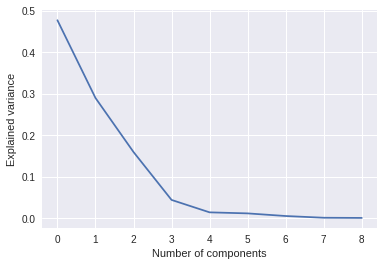

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

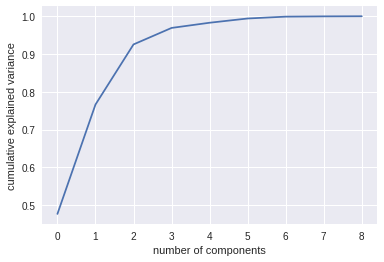

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

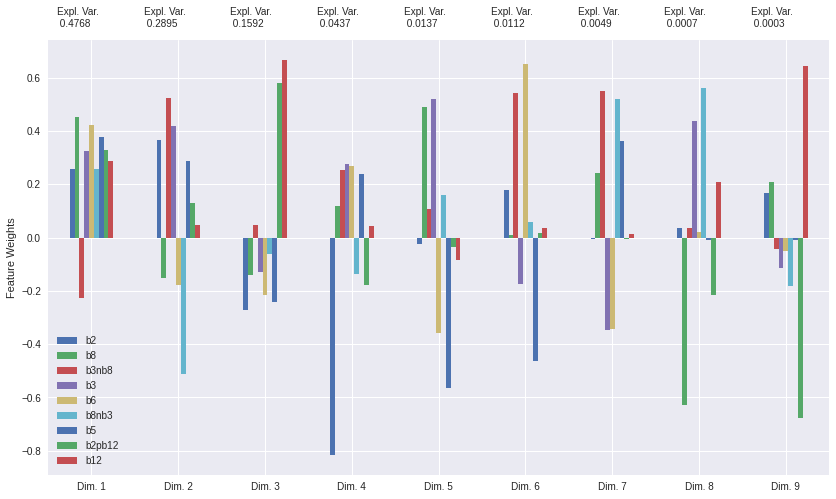

In [ ]:
def pca_results(X_scaled, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X_scaled.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X_scaled, pca)

In [ ]:
print(pca_results.cumsum())

        Explained Variance      b2      b8   b3nb8      b3      b6   b8nb3  \
Dim. 1              0.4768  0.2561  0.4505 -0.2251  0.3228  0.4209  0.2585   
Dim. 2              0.7663  0.6217  0.2976  0.2968  0.7411  0.2435 -0.2535   
Dim. 3              0.9255  0.3504  0.1587  0.3449  0.6121  0.0294 -0.3148   
Dim. 4              0.9692 -0.4654  0.2785  0.5966  0.8896  0.2970 -0.4499   
Dim. 5              0.9829 -0.4886  0.7683  0.7037  1.4086 -0.0603 -0.2890   
Dim. 6              0.9941 -0.3117  0.7763  1.2476  1.2338  0.5912 -0.2312   
Dim. 7              0.9990 -0.3165  1.0199  1.7960  0.8852  0.2468  0.2880   
Dim. 8              0.9997 -0.2791  0.3901  1.8335  1.3240  0.2689  0.8507   
Dim. 9              1.0000 -0.1107  0.5999  1.7903  1.2092  0.2167  0.6674   

                  b5  b2pb12     b12  
Dim. 1  3.780000e-01  0.3276  0.2872  
Dim. 2  6.655000e-01  0.4585  0.3333  
Dim. 3  4.250000e-01  1.0379  1.0004  
Dim. 4  6.637000e-01  0.8613  1.0420  
Dim. 5  1.011000e-01  0.

## Landsat 8

In [ ]:
scaler=StandardScaler()
ld=scaler.fit(landsat1)
X_scaled2=ld.transform(landsat1)
columnas = landsat1.columns
X_scaled_land = pd.DataFrame(X_scaled2, columns=columnas)
X_scaled_land

In [ ]:
n = len(columnas)  # número de features
pca_land = PCA(n_components=n).fit(X_scaled_land)
print(pca_land.components_)

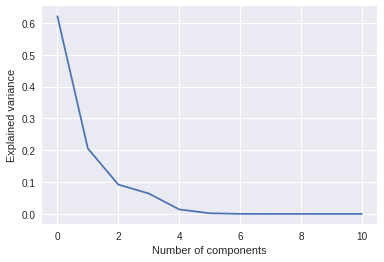

In [ ]:
plt.plot(pca_land.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

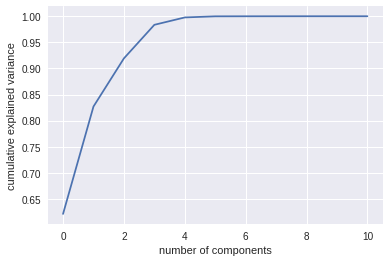

In [ ]:
plt.plot(np.cumsum(pca_land.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

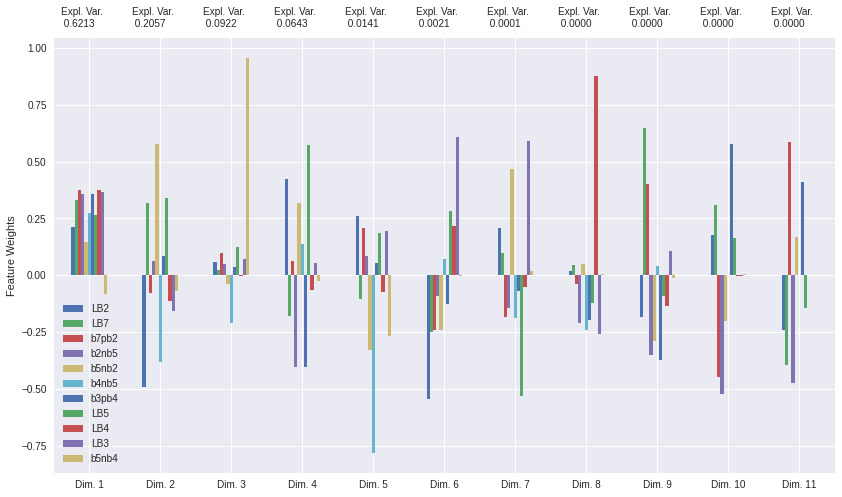

In [ ]:
def pca_results(X_scaled_land, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca_land.components_)+1)]
    
    components = pd.DataFrame(np.round(pca_land.components_, 4), columns = X_scaled_land.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca_land.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca_land.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X_scaled_land, pca_land)